# Import Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import pandas as pd

In [13]:
hdb = pd.read_csv('./archive/hdb.csv')

In [14]:
hdb

,date,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2015-01-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70
1,2015-01-01,2015,1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65
2,2015-01-01,2015,1,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64
3,2015-01-01,2015,1,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63
4,2015-01-01,2015,1,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
826576,2014-12-01,2014,12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,73
826577,2014-12-01,2014,12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,73
826578,2014-12-01,2014,12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,77
826579,2014-12-01,2014,12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,70


In [3]:
hdb_groupby_blk = hdb.groupby(["town", "flat_type", "block", "street_name", "floor_area_sqm", "lease_commence_date"])

In [4]:
hdb_groupby_blk.size().reset_index(name="counts").sort_values("counts", ascending =False)

,town,flat_type,block,street_name,floor_area_sqm,lease_commence_date,counts
15478,JURONG WEST,3 ROOM,211,BOON LAY PL,65.0,1976,667
15457,JURONG WEST,3 ROOM,186,BOON LAY AVE,59.0,1975,618
15455,JURONG WEST,3 ROOM,185,BOON LAY AVE,59.0,1975,615
15468,JURONG WEST,3 ROOM,208,BOON LAY PL,65.0,1976,613
15475,JURONG WEST,3 ROOM,210,BOON LAY PL,65.0,1977,612
...,...,...,...,...,...,...,...
25081,SENGKANG,5 ROOM,117C,RIVERVALE DR,114.0,2000,1
25071,SENGKANG,5 ROOM,116A,RIVERVALE DR,114.0,2000,1
25065,SENGKANG,5 ROOM,114,RIVERVALE WALK,123.0,1998,1
25048,SENGKANG,5 ROOM,110,RIVERVALE WALK,122.0,1999,1


# Find best blk with the most amount of unique day data

In [5]:
hdb_groupby_blk.nunique("date").reset_index().sort_values("date", ascending = False)

,town,flat_type,block,street_name,floor_area_sqm,lease_commence_date,date,year,month,storey_range,flat_model,resale_price,remaining_lease
15478,JURONG WEST,3 ROOM,211,BOON LAY PL,65.0,1976,284,31,12,12,2,249,31
15455,JURONG WEST,3 ROOM,185,BOON LAY AVE,59.0,1975,284,31,12,11,2,231,31
15475,JURONG WEST,3 ROOM,210,BOON LAY PL,65.0,1977,277,31,12,11,2,237,31
15468,JURONG WEST,3 ROOM,208,BOON LAY PL,65.0,1976,275,31,12,10,2,237,31
15457,JURONG WEST,3 ROOM,186,BOON LAY AVE,59.0,1975,275,31,12,11,2,230,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5028,BUKIT BATOK,4 ROOM,329,BT BATOK ST 33,89.0,1986,1,1,1,1,1,1,1
24750,SENGKANG,4 ROOM,299A,COMPASSVALE ST,96.0,2001,1,1,1,1,1,1,1
24747,SENGKANG,4 ROOM,298D,COMPASSVALE ST,98.0,2001,1,1,1,1,1,1,1
24743,SENGKANG,4 ROOM,298B,COMPASSVALE ST,97.0,2001,1,1,1,1,1,1,1


### Best Blk: JURONG WEST	3 ROOM	211	BOON LAY PL	65.0	1976

In [6]:
jurong_211 = hdb[(hdb.town == "JURONG WEST") & (hdb.flat_type == "3 ROOM") & (hdb.block == "211") & (hdb.street_name == "BOON LAY PL") & (hdb.floor_area_sqm == 65.0) & (hdb.lease_commence_date == 1976)]
jurong_211

,date,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
3005,2015-03-01,2015,3,JURONG WEST,3 ROOM,211,BOON LAY PL,01 TO 03,65.0,Improved,1976,262000.0,60
3010,2015-03-01,2015,3,JURONG WEST,3 ROOM,211,BOON LAY PL,10 TO 12,65.0,Improved,1976,288000.0,60
3013,2015-03-01,2015,3,JURONG WEST,3 ROOM,211,BOON LAY PL,19 TO 21,65.0,Improved,1976,291800.0,60
13933,2015-10-01,2015,10,JURONG WEST,3 ROOM,211,BOON LAY PL,13 TO 15,65.0,Improved,1976,260000.0,60
13941,2015-10-01,2015,10,JURONG WEST,3 ROOM,211,BOON LAY PL,10 TO 12,65.0,Improved,1976,280000.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
821480,2014-09-01,2014,9,JURONG WEST,3 ROOM,211,BOON LAY PL,16 TO 18,65.0,Improved,1976,268000.0,61
821494,2014-09-01,2014,9,JURONG WEST,3 ROOM,211,BOON LAY PL,04 TO 06,65.0,Improved,1976,302000.0,61
822996,2014-10-01,2014,10,JURONG WEST,3 ROOM,211,BOON LAY PL,10 TO 12,65.0,Improved,1976,292000.0,61
822998,2014-10-01,2014,10,JURONG WEST,3 ROOM,211,BOON LAY PL,19 TO 21,65.0,Improved,1976,295000.0,61


In [7]:
jurong_211_median = jurong_211.groupby("date").median("resale_price").reset_index()

In [8]:
jurong_211_median

,date,year,month,floor_area_sqm,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,1990.0,1.0,65.0,1976.0,25000.0,85.0
1,1990-02-01,1990.0,2.0,65.0,1976.0,22500.0,85.0
2,1990-03-01,1990.0,3.0,65.0,1976.0,25000.0,85.0
3,1990-04-01,1990.0,4.0,65.0,1976.0,29750.0,85.0
4,1990-05-01,1990.0,5.0,65.0,1976.0,30000.0,85.0
...,...,...,...,...,...,...,...
279,2019-11-01,2019.0,11.0,65.0,1976.0,217000.0,56.0
280,2020-02-01,2020.0,2.0,65.0,1976.0,210000.0,55.0
281,2020-07-01,2020.0,7.0,65.0,1976.0,230000.0,55.0
282,2020-08-01,2020.0,8.0,65.0,1976.0,225000.0,55.0


In [9]:
jurong_211_median_drop = pd.DataFrame({"Month":jurong_211_median.date, "resale_price":jurong_211_median.resale_price})

### Save jurong_211 to csv

In [10]:
jurong_211_median_drop.to_csv("jurong_211.csv", index = False)

# Start of ARIMA

## ARIMA 3 Parameters

p: the number of lag observations in the model; also known as the lag order.

d: the number of times that the raw observations are differenced; also known as the degree of differencing.

q: the size of the moving average window; also known as the order of the moving average.

source: https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp#:~:text=An%20autoregressive%20integrated%20moving%20average%2C%20or%20ARIMA%2C%20is%20a%20statistical,values%20based%20on%20past%20values.

## Load DF

In [44]:
df = pd.read_csv("jurong_211.csv", index_col="month", parse_dates=True)
df

,resale_price
Month,
1990-01-01,25000.0
1990-02-01,22500.0
1990-03-01,25000.0
1990-04-01,29750.0
1990-05-01,30000.0
...,...
2019-11-01,217000.0
2020-02-01,210000.0
2020-07-01,230000.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 284 entries, 1990-01-01 to 2020-09-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   resale_price  284 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB


In [46]:
df.groupby(df.index.year).size()

Month
1990    12
1991    11
1992     9
1993    11
1994    12
1995    11
1996    12
1997    12
1998    11
1999    11
2000     9
2001     9
2002     6
2003    10
2004    11
2005    10
2006    10
2007     9
2008    10
2009    10
2010    11
2011     8
2012     9
2013     7
2014     8
2015     3
2016     6
2017     8
2018     8
2019     6
2020     4
dtype: int64

There is a lot of missing data, for ARIMA to be a good predictor we need to more data

## Fill missing data

In [47]:
from datetime import datetime
from dateutil import relativedelta
datetime_object = datetime.strptime("1990-01-01", "%Y-%m-%d")
datetime_object += relativedelta.relativedelta(months=32)
pd.to_datetime(datetime_object)

def to_dt(date_string):
    return datetime.strptime(str(date_string)[:10], "%Y-%m-%d")

def to_pd_dt(date_string):
    return pd.to_datetime(str(date_string)[:10])

date = to_dt(df.index[0])
print(date)
end_date = to_dt(df.index[-1])
while(date < end_date):
#     print(date)
    try:
        df.loc[to_pd_dt(date)]
        date += relativedelta.relativedelta(months=1)
    except KeyError:
        a = df.loc[to_pd_dt(date - relativedelta.relativedelta(months=1))]["resale_price"]
        date_i = date + relativedelta.relativedelta(months=1)
        count = 1
        while count < 10:
            try:
                df.loc[to_pd_dt(date_i)]
                break
            except KeyError:
                count += 1
            date_i += relativedelta.relativedelta(months=1)
        
        
        b = df.loc[to_pd_dt(date_i)]["resale_price"]
        diff = b-a
        incre = diff/(count+1)
        while (count > 0):
            a += incre
            df.loc[to_pd_dt(date)] = a
            count -= 1
            date += relativedelta.relativedelta(months=1)
print(date)
# while()

# for year in range(1990,2020+1):
#     for month in range(1,12+1):
#         try:
#             df.loc[pd.to_datetime(f'{year}-{month:}-01')]
#         except KeyError:
#             df.loc[pd.to_datetime(f'{year}-{month:}-01')] = None

1990-01-01 00:00:00
2020-09-01 00:00:00


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 369 entries, 1990-01-01 to 2020-06-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   resale_price  369 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


In [50]:
df = df.sort_index(ascending = True)
df

,resale_price
Month,
1990-01-01,25000.0
1990-02-01,22500.0
1990-03-01,25000.0
1990-04-01,29750.0
1990-05-01,30000.0
...,...
2020-05-01,222000.0
2020-06-01,226000.0
2020-07-01,230000.0


In [51]:
df.groupby(df.index.year).size()

Month
1990    12
1991    12
1992    12
1993    12
1994    12
1995    12
1996    12
1997    12
1998    12
1999    12
2000    12
2001    12
2002    12
2003    12
2004    12
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020     9
dtype: int64

All data for each year is filled by left and right bound increment

2020 Data stops at 2020-09

## PD vs Py datetime Testing (To be removed)

Why must pandas and python have 2 different classes for datetime T-T

In [20]:
pd.to_datetime(f'{year}-{month:}-01')

NameError: name 'year' is not defined

In [376]:
from datetime import datetime
from dateutil import relativedelta
datetime_object = datetime.strptime("1990-01-01", "%Y-%m-%d")
datetime_object += relativedelta.relativedelta(months=32)
pd.to_datetime(datetime_object)

Timestamp('1992-09-01 00:00:00')

In [292]:
type(df.iloc[-1].name)

pandas._libs.tslibs.timestamps.Timestamp

In [293]:
df.iloc[-1].name.timedelta(days=5)

AttributeError: 'Timestamp' object has no attribute 'timedelta'

## Obtaining d value

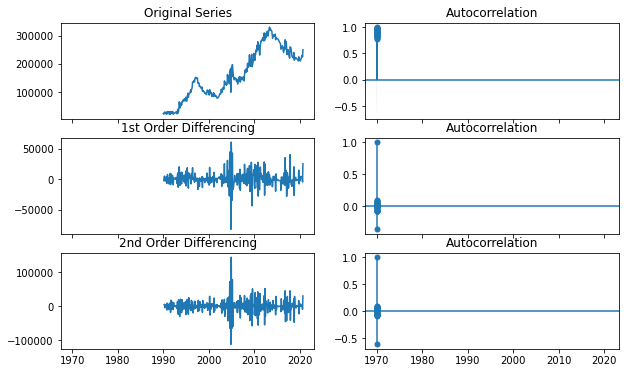

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df); axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

d value 1 is good, d value 2 might be over differentiating alr (bad model)

## Old ARIMA module

idk how to use the new module cos most guides online are using the old model but its going to be deprecated soon

### p value = 1 not very good prediction (almost like linear)

/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so 

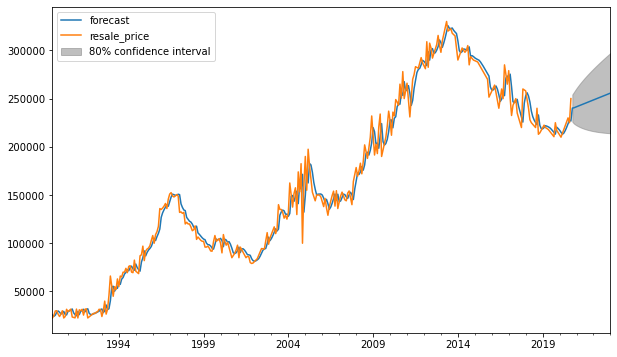

In [64]:
from statsmodels.tsa.arima_model import ARIMA
len(df)
model = ARIMA(df, order=(1,1,1))
model_fit = model.fit(disp=0)
model_fit.plot_predict(end = '2023', alpha = 0.2)
plt.show()

### p value = 21 not bad but quite slow

/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so 

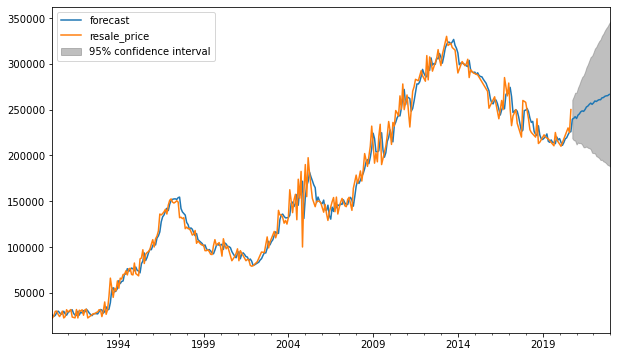

In [54]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df, order=(21,1,1))
model_fit = model.fit(disp=0)
model_fit.plot_predict(end='2023')
plt.show()

# DO NOT USE P VALUE MORE THAN 30 
Its too computationally expensive (rip laptop)

/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so 

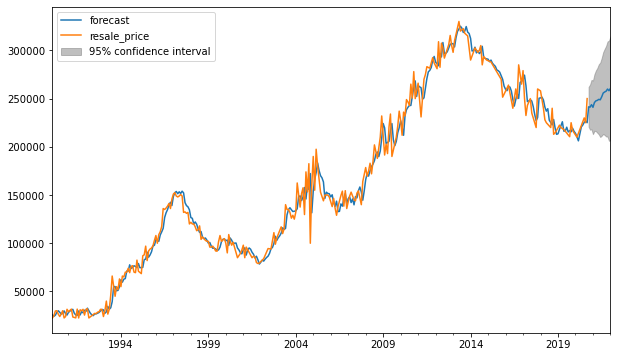

In [37]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df, order=(30,1,1))
model_fit = model.fit(disp=0)
model_fit.plot_predict(end='2022')
plt.show()

## Extract prediction to conduction prediction accuracy

In [51]:
# no filler
from statsmodels.tsa.arima.model import ARIMA
len(df)
model = ARIMA(df, order=(1,1,1))
model.pre

/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


TypeError: predict() missing 1 required positional argument: 'params'

/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


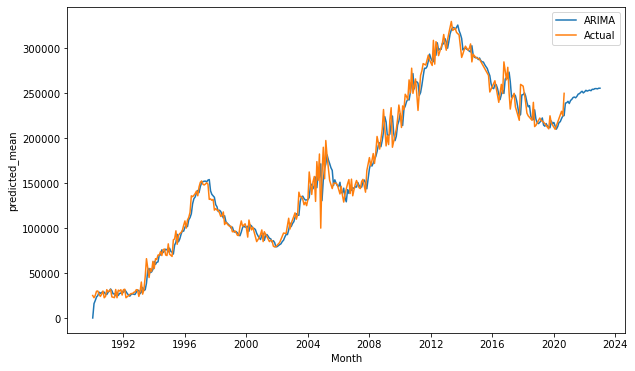

In [63]:
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sb
len(df)
model = ARIMA(df, order=(21,1,1))
model_fit = model.fit()
a = model_fit.predict(end = '2023')
ax = sb.lineplot(data = a, label="ARIMA")
b = df.squeeze()
ax = sb.lineplot(data = b, label="Actual")

/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


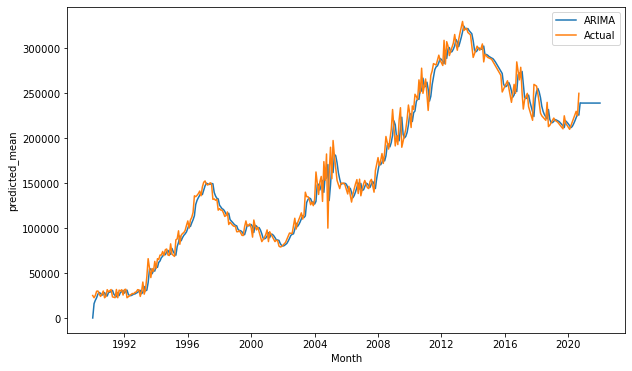

In [136]:
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sb
len(df)
model = ARIMA(df, order=(1,1,1))
model_fit = model.fit()
a = model_fit.predict(end='2022')
ax = sb.lineplot(data = a, label="ARIMA")
ax = sb.lineplot(data = b, label="Actual")
b = df.squeeze()
print(type(a.index[0]))

In [608]:
df.loc[pd.Period("1991-02", "M")] = 23

In [24]:
df = df.sort_index()

<AxesSubplot:xlabel='Month'>

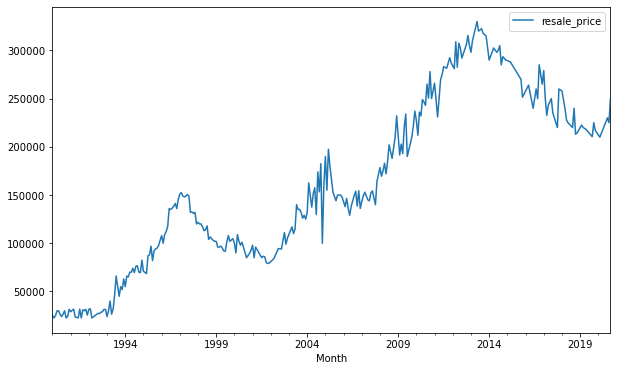

In [25]:
df.plot()

<AxesSubplot:xlabel='Month'>

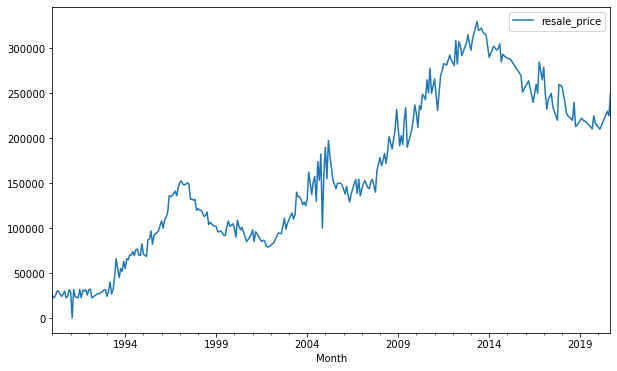

In [619]:
df.plot()

# Web Scrape (failed 403 Forbidden)
propertyguru denied access for scrapping (no choice but to use selenium)

In [6]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

In [7]:
url = "https://www.propertyguru.com.sg/singapore-property-listing/hdb/jurong-west/boon-lay-place_103145/211/last-transacted-prices-and-insights"

In [8]:
response = requests.get(url)

In [10]:
soup = bs(response.content, 'html.parser')

In [11]:
soup

<!DOCTYPE html>

<html lang="en-US">
<head>
<title>Access was denied</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<link href="/cdn-cgi/styles/errors.new.min.css" media="screen" rel="stylesheet" type="text/css"/>
<script type="text/javascript">
(function(){if(document.addEventListener&&window.XMLHttpRequest&&JSON&&JSON.stringify){var e=function(a){var c=document.getElementById("error-feedback-survey"),d=document.getElementById("error-feedback-success"),b=new XMLHttpRequest;a={event:"feedback clicked",properties:{errorCode:1020,helpful:a,version:2}};b.open("POST","https://sparrow.cloudflare.com/api/v1/event");b.setRequestHeader("Content-Type","application/json");b.setRequestHeader("Sparrow-Source-Key","c771f0e4b54944bebf4261d44bd79a1e");
b.send(JSON.stringify(a));c.classList.add("feedb

## Auto ARIMA 
At first it was light a beam of hope, afterwards I realised manual testing is better :(

In [131]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df, trace = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7905.320, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7965.129, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7915.307, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7902.074, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7964.074, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7904.153, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7905.094, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7902.152, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.622 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  369
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -3948.037
Date:                Sat, 02 Apr 2022   AIC                           7902.074
Time:                        13:38:19   BIC                           7913.798
Sample:                             0   HQIC                          7906.732
                                - 369                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    995.3117    321.997      3.091      0.002     364.208    1626.415
ma.L1         -0.4492      0.034    -13.242      0.000      -0.516      -0.383
sigma2      1.232e+08      0.002   8.08e+10      0.000    1.23e+08    1.23e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               503.22
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.71   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.6e+26. Standard errors may be unstable.
"""

In [198]:
model = ARIMA(df, order=(1,1,1))
model = model.fit()
model.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08711D+01    |proj g|=  9.40403D-04

At iterate    5    f=  1.08711D+01    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     13      1     0     0   1.776D-07   1.087D+01
  F =   10.871103017567195     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.resale_price   No. Observations:                  283
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3076.522
Method:                       css-mle   S.D. of innovations          12728.359
Date:                Wed, 30 Mar 2022   AIC                           6161.044
Time:                        14:21:02   BIC                           6175.626
Sample:                             1   HQIC                          6166.891
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  760.9371    388.099      1.961      0.050       0.278    1521.597
ar.L1.D.resale_price    -0.1449      0.102     -1.427      0.154      -0.344       0.054
ma.L1.D.resale_price    -0.4146      0.090     -4.623      0.000      -0.590      -0.239
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -6.9022           +0.0000j            6.9022            0.5000
MA.1            2.4122           +0.0000j            2.4122            0.0000
-----------------------------------------------------------------------------
"""

In [202]:
model.plot()
df.plot()

AttributeError: 'ARIMAResults' object has no attribute 'plot'

In [186]:
df

0       25000.0
1       22500.0
2       25000.0
3       29750.0
4       30000.0
         ...   
279    217000.0
280    210000.0
281    230000.0
282    225000.0
283    250000.0
Name: resale_price, Length: 284, dtype: float64

# ARIMA Playground (To be removed)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [74]:
dataset = pd.read_csv("jurong_211.csv")
dataset["Month"] = pd.to_datetime(dataset["Month"], infer_datetime_format = True)
indexedDataset = dataset.set_index(["Month"])

In [79]:
indexedDataset.tail(10)

,resale_price
Month,
2019-02-01,222500.0
2019-03-01,220000.0
2019-05-01,218000.0
2019-09-01,210500.0
2019-10-01,225000.0
2019-11-01,217000.0
2020-02-01,210000.0
2020-07-01,230000.0
2020-08-01,225000.0


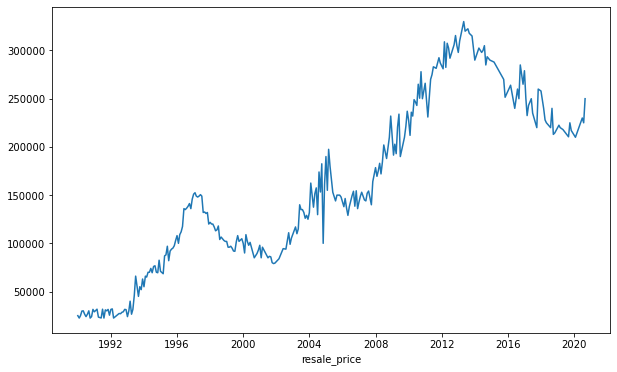

In [80]:
plt.xlabel("Date")
plt.xlabel("resale_price")
plt.plot(indexedDataset)

In [83]:
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

             resale_price
Month                    
1990-01-01            NaN
1990-02-01            NaN
1990-03-01            NaN
1990-04-01            NaN
1990-05-01            NaN
...                   ...
2019-11-01  221120.333333
2020-02-01  219620.333333
2020-07-01  220037.000000
2020-08-01  220453.666667
2020-09-01  221287.000000

[284 rows x 1 columns]             resale_price
Month                   
1990-01-01           NaN
1990-02-01           NaN
1990-03-01           NaN
1990-04-01           NaN
1990-05-01           NaN
...                  ...
2019-11-01   7910.334866
2020-02-01   8188.902550
2020-07-01   8604.188768
2020-08-01   8722.485961
2020-09-01  10952.345984

[284 rows x 1 columns]


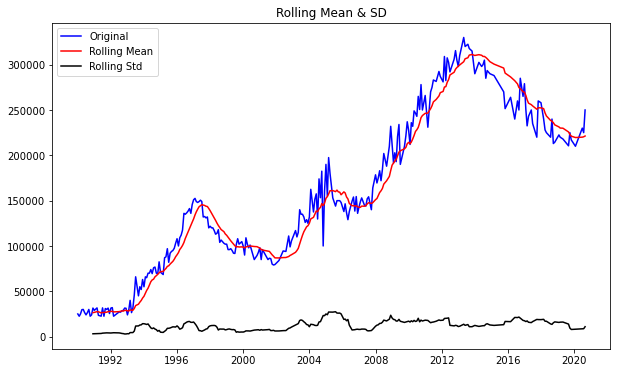

In [88]:
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean & SD")
plt.show(block=False)

In [100]:
from statsmodels.tsa.stattools import adfuller

print("Results of Dickey-Fuller Test: ")
dftest = adfuller(indexedDataset["resale_price"], autolag="AIC")

dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
for key, value in dftest[4].items():
    dfoutput[f"Critical Value ({key})"] = value
    
print(dfoutput)

Results of Dickey-Fuller Test: 
Test Statistic                  -1.359596
p-value                          0.601486
#Lags Used                      10.000000
Number of Observations Used    273.000000
Critical Value (1%)             -3.454533
Critical Value (5%)             -2.872186
Critical Value (10%)            -2.572443
dtype: float64


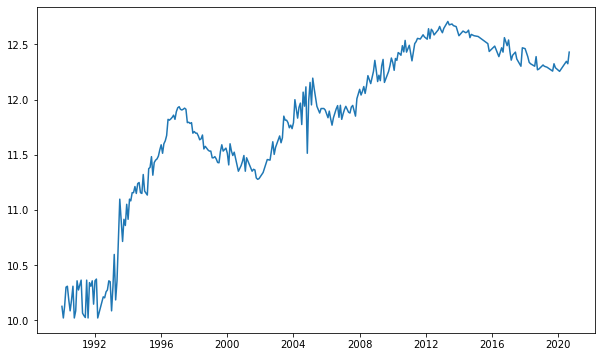

In [101]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

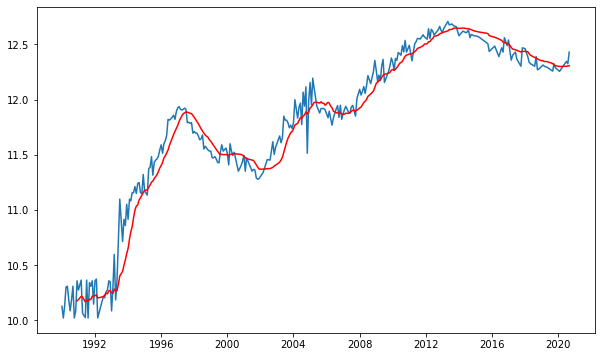

In [102]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [107]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,resale_price
Month,
1990-12-01,0.181622
1991-01-01,0.086562
1991-03-01,0.147016
1991-04-01,-0.147144
1991-05-01,-0.147206
1991-06-01,-0.141146
1991-07-01,0.182289
1991-08-01,-0.155134
1991-09-01,0.152268


In [108]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title("Rolling Mean & SD")
    plt.show(block=False)
    
    
    print("Results of Dickey-Fuller Test: ")
    dftest = adfuller(indexedDataset["resale_price"], autolag="AIC")

    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput[f"Critical Value ({key})"] = value

    print(dfoutput)

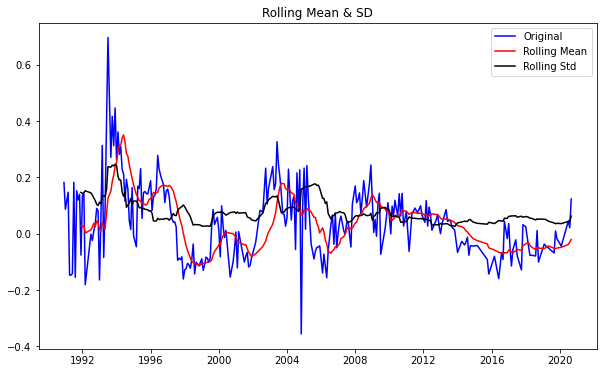

Results of Dickey-Fuller Test: 
Test Statistic                  -1.359596
p-value                          0.601486
#Lags Used                      10.000000
Number of Observations Used    273.000000
Critical Value (1%)             -3.454533
Critical Value (5%)             -2.872186
Critical Value (10%)            -2.572443
dtype: float64


In [109]:
test_stationary(datasetLogScaleMinusMovingAverage)

# Start of LSTM (Failed)

I tried my best... I still dk how to implement this model

In [112]:
df = pd.read_csv("jurong_211.csv")
df1=df.reset_index()['resale_price']

In [224]:
df = pd.read_csv("jurong_211.csv", index_col="Month", parse_dates=True)

In [227]:
df

,resale_price
Month,
1990-01-01,25000.0
1990-02-01,22500.0
1990-03-01,25000.0
1990-04-01,29750.0
1990-05-01,30000.0
...,...
2019-11-01,217000.0
2020-02-01,210000.0
2020-07-01,230000.0


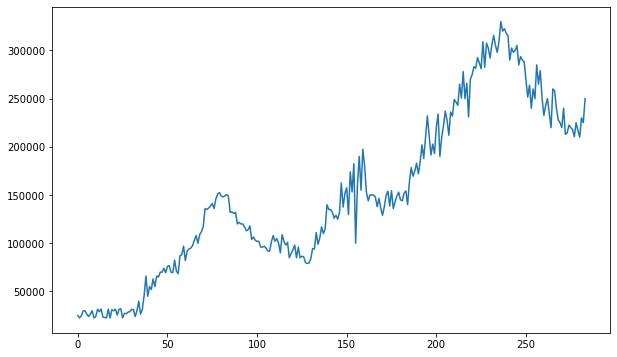

In [116]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [118]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [131]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [132]:
training_size,test_size

(184, 100)

In [122]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [133]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 12
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [134]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [135]:
print(X_train.shape), print(y_train.shape)

(171, 12, 1)
(171,)


(None, None)

In [136]:
print(X_test.shape), print(ytest.shape)

(87, 12, 1)
(87,)


(None, None)

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [148]:
model=Sequential()
model.add(LSTM(6,return_sequences=True,input_shape=(12,1)))
model.add(LSTM(6,return_sequences=True))
model.add(LSTM(6))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [149]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 12, 6)             192       
                                                                 
 lstm_7 (LSTM)               (None, 12, 6)             312       
                                                                 
 lstm_8 (LSTM)               (None, 6)                 312       
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 823
Trainable params: 823
Non-trainable params: 0
_________________________________________________________________


In [150]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=12,batch_size=64,verbose=1)

Epoch 1/12
3/3 [==============================] - 4s 390ms/step - loss: 0.0344 - val_loss: 0.2291
Epoch 2/12
3/3 [==============================] - 0s 25ms/step - loss: 0.0229 - val_loss: 0.1786
Epoch 3/12
3/3 [==============================] - 0s 22ms/step - loss: 0.0138 - val_loss: 0.1327
Epoch 4/12
3/3 [==============================] - 0s 18ms/step - loss: 0.0077 - val_loss: 0.0938
Epoch 5/12
3/3 [==============================] - 0s 18ms/step - loss: 0.0053 - val_loss: 0.0645
Epoch 6/12
3/3 [==============================] - 0s 17ms/step - loss: 0.0056 - val_loss: 0.0467
Epoch 7/12
3/3 [==============================] - 0s 19ms/step - loss: 0.0069 - val_loss: 0.0403
Epoch 8/12
3/3 [==============================] - 0s 18ms/step - loss: 0.0072 - val_loss: 0.0421
Epoch 9/12
3/3 [==============================] - 0s 18ms/step - loss: 0.0062 - val_loss: 0.0496
Epoch 10/12
3/3 [==============================] - 0s 18ms/step - loss: 0.0052 - val_loss: 0.0591
Epoch 11/12
3/3 [===========

In [151]:
import tensorflow as tf


In [152]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [153]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [154]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

102612.67592243868

In [155]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

180396.07065232212

In [156]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: could not broadcast input array from shape (87,1) into shape (0,1)